In [4]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Normalizing labels

In [2]:
input_folder = 'nighttime_normalized'

label_mapping = {4:0, 5:1, 6:2, 7:3}

for filename in os.listdir(input_folder):
    if filename.endswith('.txt'):
        file_path = os.path.join(input_folder, filename)

        with open(file_path, 'r') as infile:
            lines = infile.readlines()
        
        with open(file_path, 'w') as outfile:
            for line in lines:
                parts = line.strip().split()
                label = int(parts[0])
                if label in label_mapping:
                    parts[0] = str(label_mapping[label])
                outfile.write(' '.join(parts) + '\n')
print('Done')

Done


# Label visualization

In [10]:
label_names = {
    0: 'Xe máy',
    1: 'Xe ô tô con',
    2: 'Xe vận tải du lịch (xe khách)',
    3: 'Xe vận tải container'
}

### Folder daytime

Thống kê số lượng nhãn:
Nhãn 0: 65616
Nhãn 3: 11873
Nhãn 1: 17558
Nhãn 2: 4035


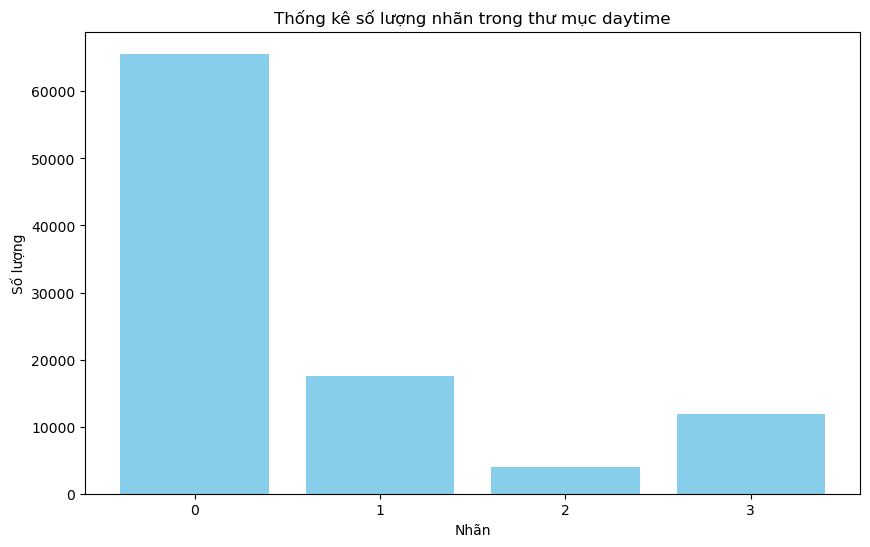

In [7]:
input_folder = 'daytime'

label_counts = Counter()

for filename in os.listdir(input_folder):
    if filename.endswith('.txt'):
        file_path = os.path.join(input_folder, filename)
        
        with open(file_path, 'r') as infile:
            for line in infile:
                parts = line.strip().split()
                label = int(parts[0])
                label_counts[label] += 1

print("Thống kê số lượng nhãn:")
for label, count in label_counts.items():
    print(f'Nhãn {label}: {count}')

labels = list(label_counts.keys())
counts = list(label_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.title('Thống kê số lượng nhãn trong thư mục daytime')
plt.xticks(labels)
plt.show()

### Folder nighttime_normalization

Thống kê số lượng nhãn: 
Nhãn 3: 2823
Nhãn 1: 8554
Nhãn 0: 15857
Nhãn 2: 2462


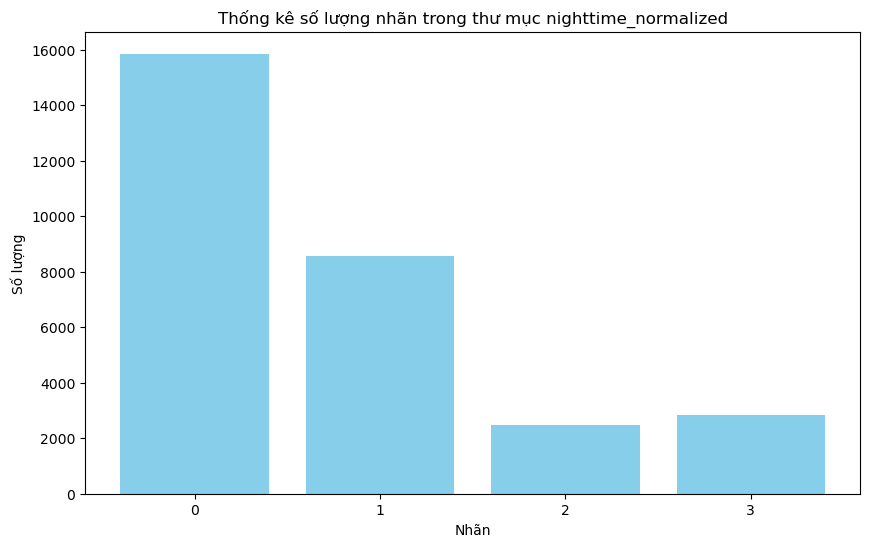

In [6]:
input_folder = 'nighttime_normalized'

label_counts = Counter()

for filename in os.listdir(input_folder):
    if filename.endswith('.txt'):
        file_path = os.path.join(input_folder, filename)
        
        with open(file_path, 'r') as infile:
            for line in infile:
                parts = line.strip().split()
                label = int(parts[0])
                label_counts[label] += 1

print("Thống kê số lượng nhãn:")
for label, count in label_counts.items():
    print(f'Nhãn {label}: {count}')

labels = list(label_counts.keys())
counts = list(label_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.title('Thống kê số lượng nhãn trong thư mục nighttime_normalized')
plt.xticks(labels)
plt.show()

### Total

Thống kê tổng số lượng nhãn từ cả hai thư mục:
Nhãn 3: 14696
Nhãn 1: 26112
Nhãn 0: 81473
Nhãn 2: 6497


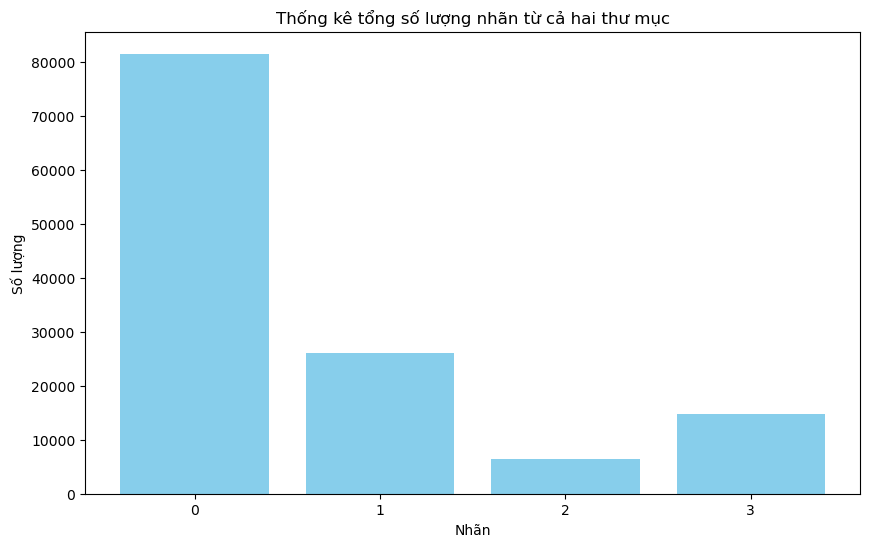

In [9]:
folders = ['nighttime_normalized', 'daytime']

label_counts = Counter()

for folder in folders:
    for filename in os.listdir(folder):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder, filename)

            with open(file_path, 'r') as infile:
                for line in infile:
                    parts = line.strip().split()
                    label = int(parts[0])
                    label_counts[label] += 1

print("Thống kê tổng số lượng nhãn từ cả hai thư mục:")
for label, count in label_counts.items():
    print(f'Nhãn {label}: {count}')

labels = list(label_counts.keys())
counts = list(label_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.title('Thống kê tổng số lượng nhãn từ cả hai thư mục')
plt.xticks(labels)
plt.show()

# Spliting data

In [11]:
import shutil
import random

data_folders = ['daytime', 'nighttime_normalized']
train_folder = 'train'
valid_folder = 'valid'

os.makedirs(os.path.join(train_folder, 'images'), exist_ok=True)
os.makedirs(os.path.join(train_folder, 'labels'), exist_ok=True)
os.makedirs(os.path.join(valid_folder, 'images'), exist_ok=True)
os.makedirs(os.path.join(valid_folder, 'labels'), exist_ok=True)

def copy_files(file_list, src_folder, dest_folder):
    for image_file in file_list:
        image_path  = os.path.join(src_folder, image_file)
        label_path = os.path.join(src_folder, image_file.replace('.jpg', '.txt'))

        shutil.copy(image_path, os.path.join(dest_folder, 'images', image_file))
        if os.path.exists(label_path):
            shutil.copy2(label_path, os.path.join(dest_folder, 'labels', image_file.replace('.jpg', '.txt')))

for folder in data_folders:
    image_files = [f for f in os.listdir(folder) if f.endswith('.jpg')]

    train_size = int(0.7 * len(image_files))
    train_files = random.sample(image_files, train_size)
    valid_files = list(set(image_files) - set(train_files))

    copy_files(train_files, folder, train_folder)
    copy_files(valid_files, folder, valid_folder)

### Checking quantity

In [14]:
import os

data_folders = ['daytime', 'nighttime']
train_folder = 'train/images'
valid_folder = 'valid/images'

def count_files(folder):
    return len([f for f in os.listdir(folder) if f.endswith('.jpg')])

total_source_files = sum(count_files(folder) for folder in data_folders)

total_train_files = count_files(train_folder)
total_valid_files = count_files(valid_folder)

total_copied_files = total_train_files + total_valid_files

print(f"Tổng số lượng file trong các thư mục nguồn (daytime và nighttime): {total_source_files}")
print(f"Tổng số lượng file trong tập train: {total_train_files}")
print(f"Tổng số lượng file trong tập valid: {total_valid_files}")
print(f"Tổng số lượng file đã sao chép vào train và valid: {total_copied_files}")

if total_source_files == total_copied_files:
    print("Tổng số lượng file trong tập train và valid bằng với tổng số lượng file trong thư mục nguồn.")
else:
    print("Tổng số lượng file trong tập train và valid không bằng với tổng số lượng file trong thư mục nguồn.")


Tổng số lượng file trong các thư mục nguồn (daytime và nighttime): 11521
Tổng số lượng file trong tập train: 8064
Tổng số lượng file trong tập valid: 3457
Tổng số lượng file đã sao chép vào train và valid: 11521
Tổng số lượng file trong tập train và valid bằng với tổng số lượng file trong thư mục nguồn.
